## Iris Classification
Récupération des librairies

In [16]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_text
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns


On prépare le dataset à partir des données contenues dans iris

In [21]:
iris = load_iris()
X = iris.data   #Input
y = iris.target #Output
df = pd.DataFrame(X, columns=iris.feature_names) #Create a dataframe with the data
df['Label'] = y #Add the output to the dataframe
df['Species'] = df['Label'].map({0: 'setosa', 1: 'versicolor', 2: 'virginica'}) #Add the species name to the dataframe
df = df.drop(['Label'], axis=1) #Drop the label column


3 commandes intéressantes : 

In [19]:
df.head() #Show the first 5 rows of the dataframe
df.tail() #Show the last 5 rows of the dataframe
df.describe() #Show the summary of the dataframe

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Label
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


Print values in tab sort by Species

c:\Users\wandr\.pyenv\pyenv-win\versions\3.10.6\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\wandr\.pyenv\pyenv-win\versions\3.10.6\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\wandr\.pyenv\pyenv-win\versions\3.10.6\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\wandr\.pyenv\pyenv-win\versions\3.10.6\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed i

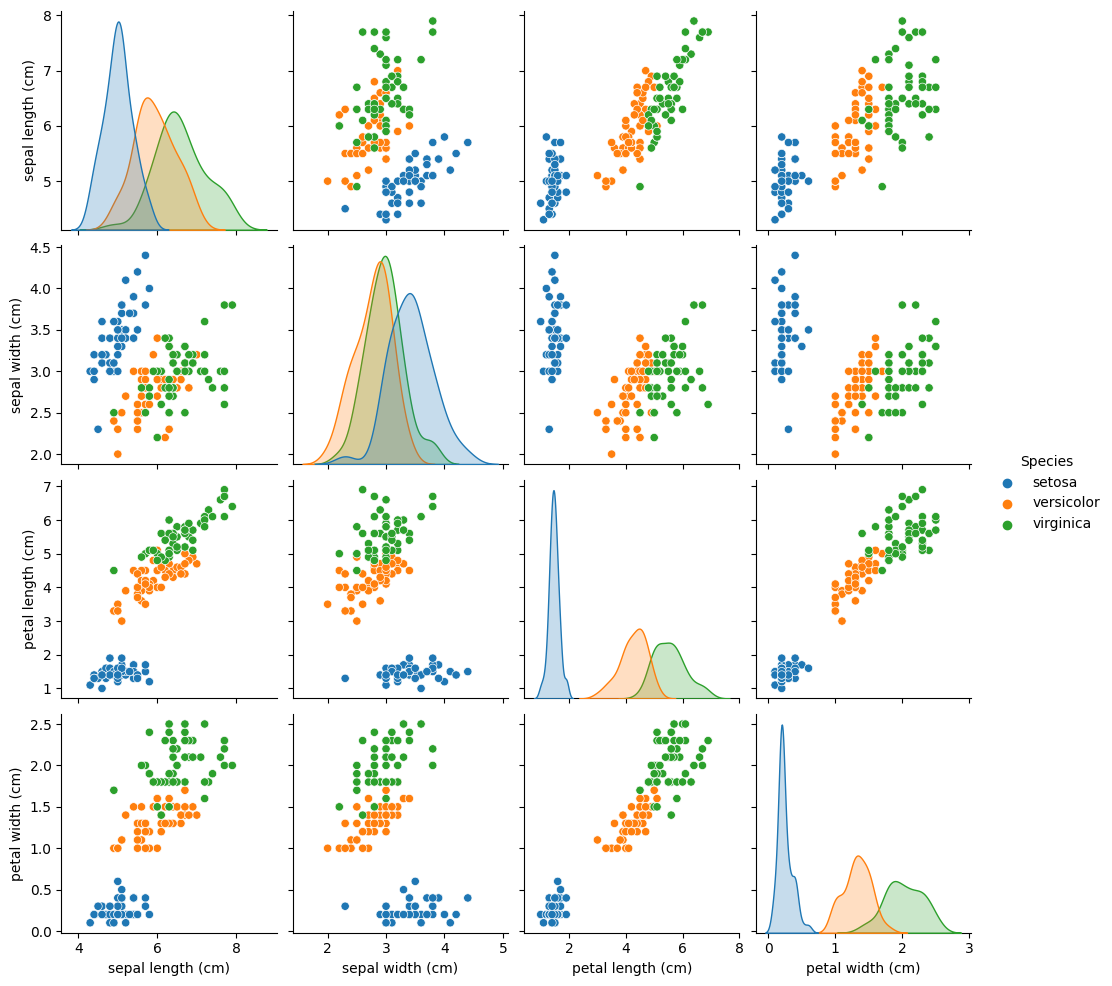

In [22]:
sns.pairplot(df,  hue='Species')  # pairplot of the data

Make a decision tree

In [23]:
model_tree = DecisionTreeClassifier() #Create a decision tree model

Training the model

In [24]:
model_tree.fit(X, y) #Fit the model to the data

DecisionTreeClassifier()

Represent output in text

In [26]:
text_representation = export_text(model_tree, feature_names=iris['feature_names']) #Create a text representation of the tree
print(text_representation) #Print the text representation

|--- petal length (cm) <= 2.45
|   |--- class: 0
|--- petal length (cm) >  2.45
|   |--- petal width (cm) <= 1.75
|   |   |--- petal length (cm) <= 4.95
|   |   |   |--- petal width (cm) <= 1.65
|   |   |   |   |--- class: 1
|   |   |   |--- petal width (cm) >  1.65
|   |   |   |   |--- class: 2
|   |   |--- petal length (cm) >  4.95
|   |   |   |--- petal width (cm) <= 1.55
|   |   |   |   |--- class: 2
|   |   |   |--- petal width (cm) >  1.55
|   |   |   |   |--- sepal length (cm) <= 6.95
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- sepal length (cm) >  6.95
|   |   |   |   |   |--- class: 2
|   |--- petal width (cm) >  1.75
|   |   |--- petal length (cm) <= 4.85
|   |   |   |--- sepal width (cm) <= 3.10
|   |   |   |   |--- class: 2
|   |   |   |--- sepal width (cm) >  3.10
|   |   |   |   |--- class: 1
|   |   |--- petal length (cm) >  4.85
|   |   |   |--- class: 2



Show in a figure the decision tree

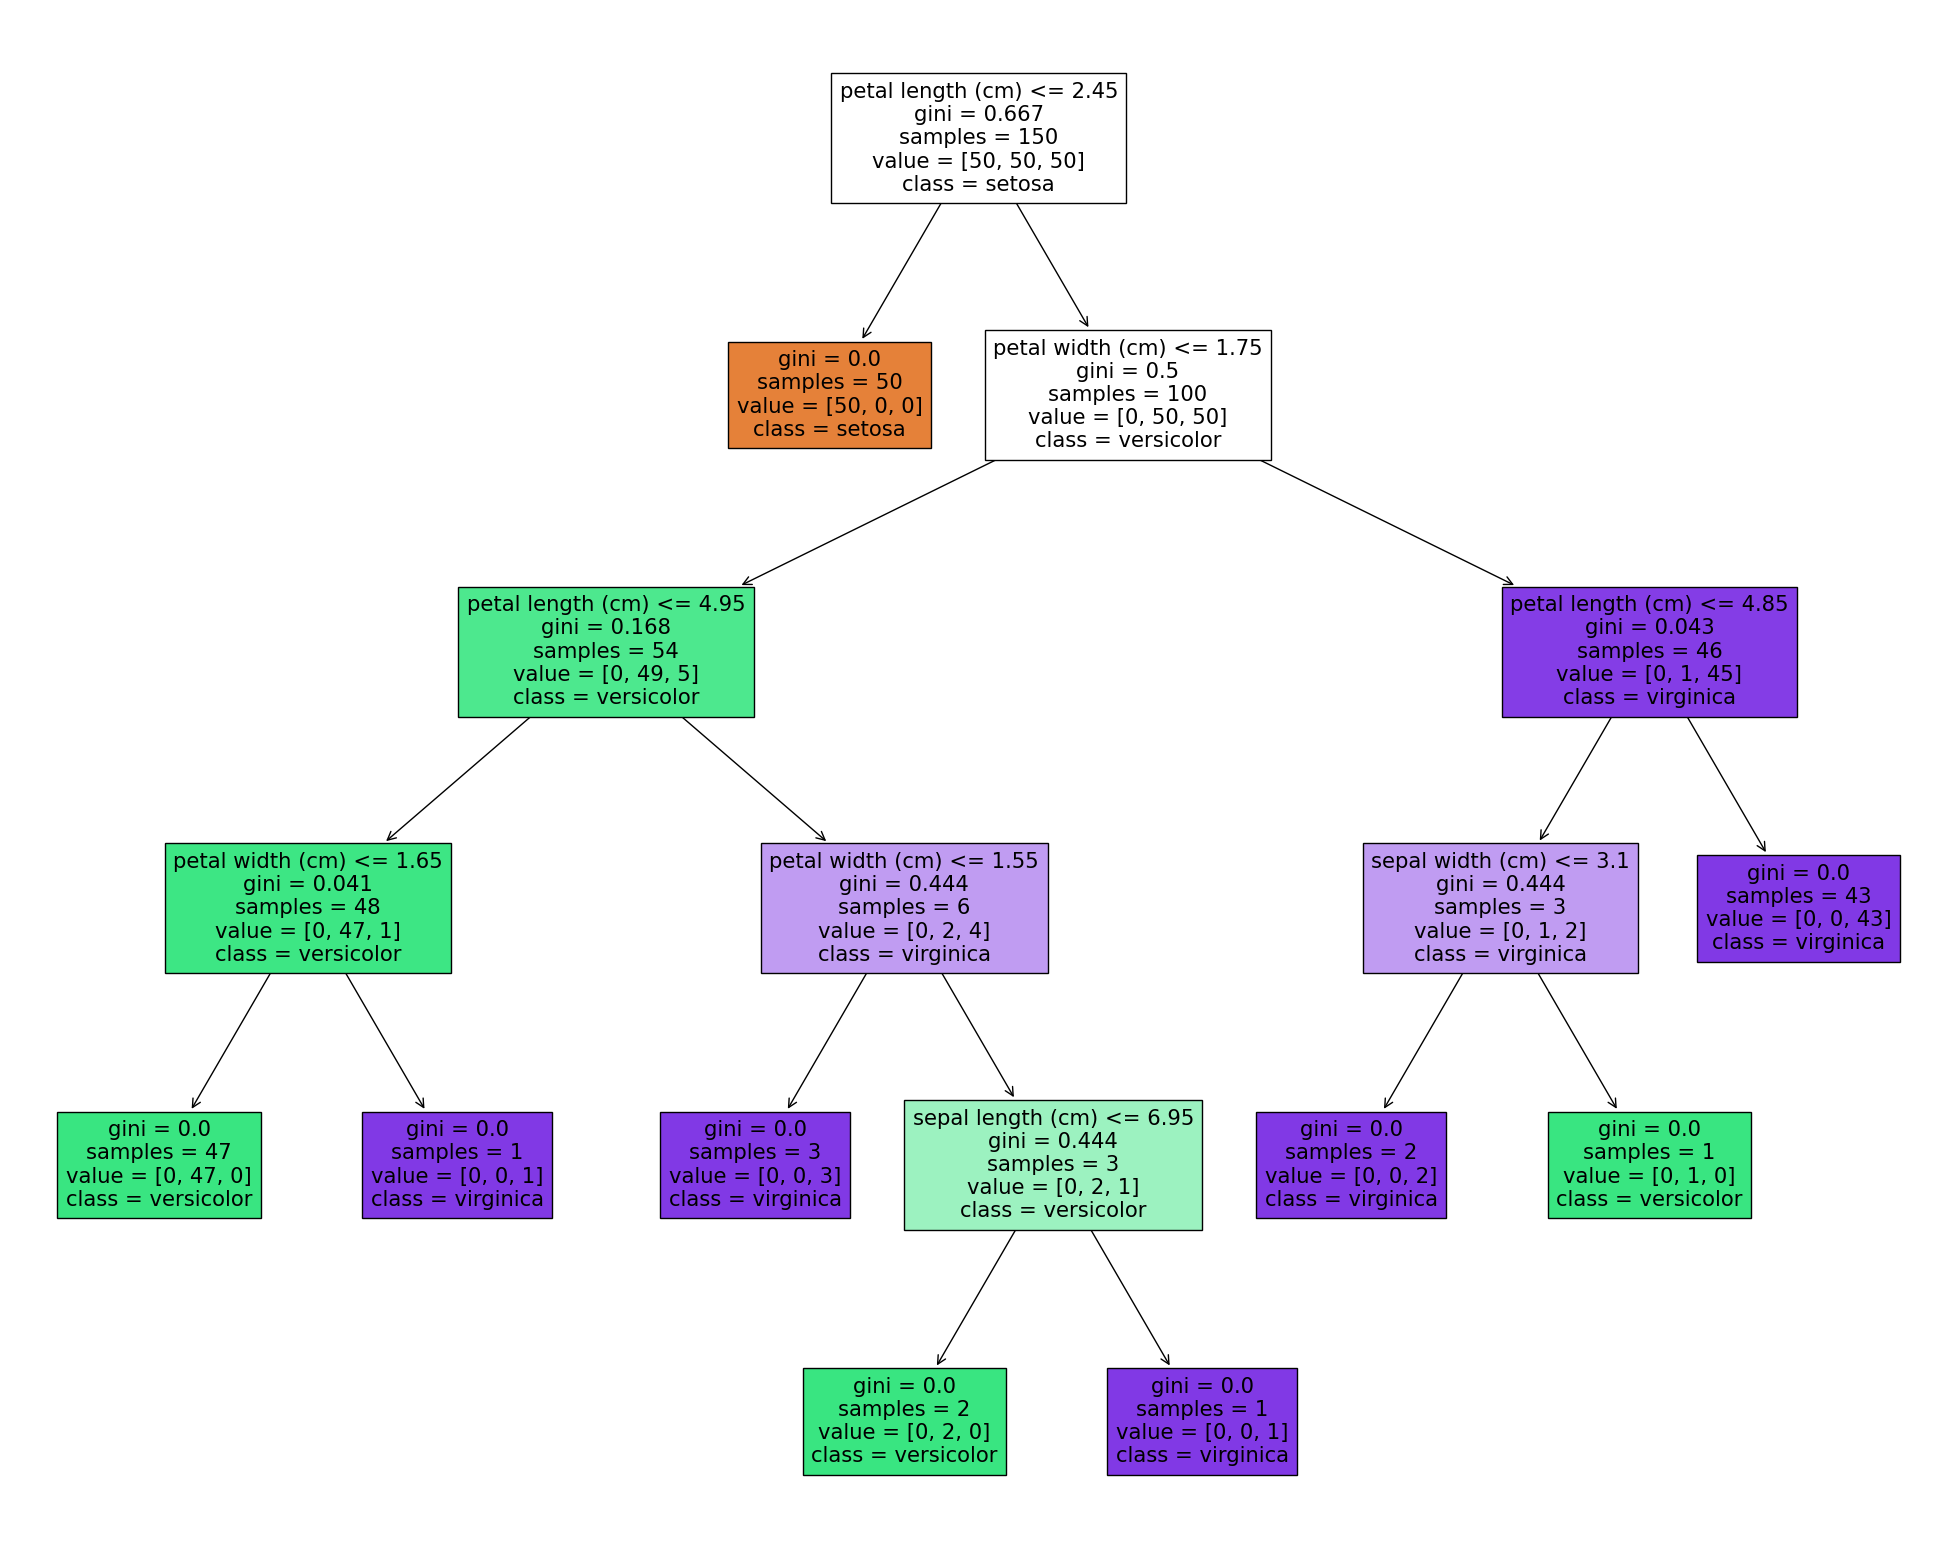

In [27]:
fig = plt.figure(figsize=(25,20)) #Create a figure
_ = plot_tree(model_tree, feature_names=iris['feature_names'], class_names=['setosa', 'versicolor', 'virginica'], filled=True) #Plot the tree